# Notebook for mapping dataset ERP123138 using kallisto bustools

Raw data downloaded from [here](https://www.ebi.ac.uk/ena/browser/view/PRJEB39602)

    Developed by: Christian Eger
    Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg
    Created on: 240603
    Last modified: 240605

## Import modules

In [1]:
import experiment
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

## Inspect mapping script

In [2]:
%%bash
cat mapping_script.py

import experiment
import os


GEX_Experiment = experiment.TenX_GEX_Experiment(
    parent_dir=os.getcwd(),
    meta_data_path='meta_data/downloads_table.csv',
    sample_col='run_accession',
    file_name_col='filename',
    url_col='url',
    mapping_output='mapping_py'
)

GEX_Experiment.create_kallisto_bustools_mapping(threads=16, memory=32)

## Run the mapping script

Paste the following commands into your terminal
```bash
mamba activate <environment>
cd <path/to/this/directory>
nohup python mapping_script.py &
```
CTRL+C
```bash
tail -f nohup.out
```

## Inspect mapping results

In [4]:
def json_file2df(filepath):
    with open(filepath, 'r') as f:
        json_dict = json.load(f)
        json_df = pd.DataFrame.from_dict(json_dict, orient='index').T
        return json_df

def get_run_data_df(Experiment, json_filename):
    mapping_path = Experiment.mapping_output
    run_info_dfs = []
    for sample in Experiment.runs:
        json_path = os.path.join(mapping_path, sample, json_filename)
        if os.path.isfile(json_path):
            run_info_dfs.append(
                json_file2df(json_path)
                .assign(sample = sample)
                .set_index('sample')
            )
    run_data_df = pd.concat(run_info_dfs)
    return run_data_df

In [3]:
GEX_Experiment = experiment.TenX_GEX_Experiment(
    parent_dir=os.getcwd(),
    meta_data_path='meta_data/downloads_table.csv',
    sample_col='run_accession',
    file_name_col='filename',
    url_col='url',
    mapping_output='mapping_py'
)

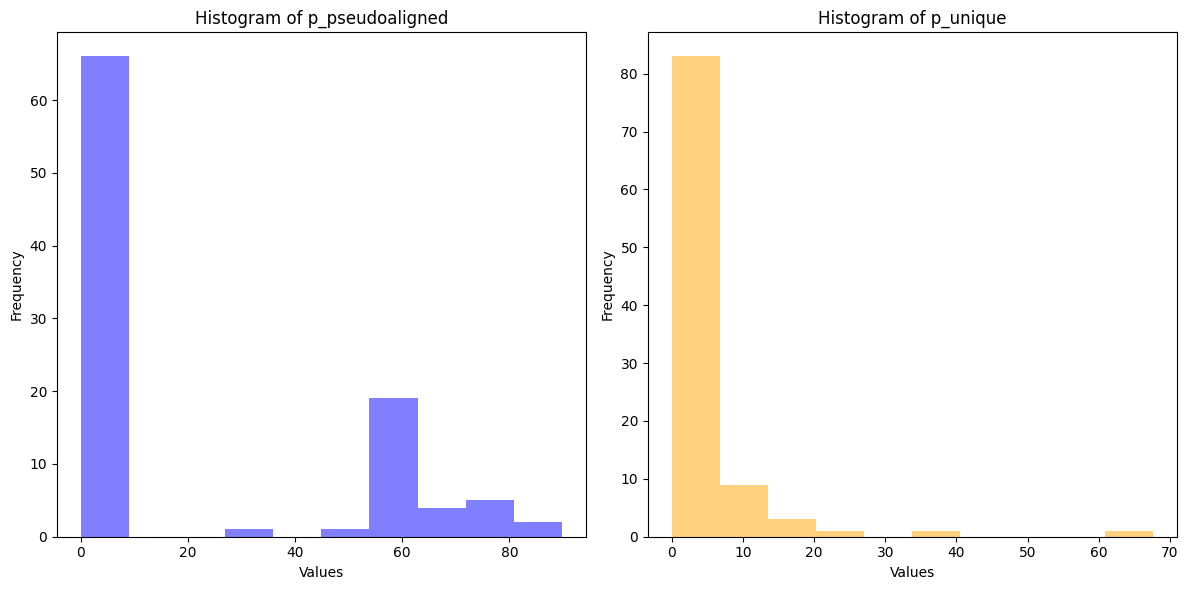

In [7]:
run_data_df = get_run_data_df(GEX_Experiment, 'run_info.json')
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(run_data_df['p_pseudoaligned'], bins=10, alpha=0.5, color='blue')
axs[0].set_title('Histogram of p_pseudoaligned')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

axs[1].hist(run_data_df['p_unique'], bins=10, alpha=0.5, color='orange')
axs[1].set_title('Histogram of p_unique')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

plt.tight_layout()

plt.savefig('figure_1.png')
plt.show()